# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv('./resumo_cartao_credito_2.csv')

In [4]:
x = df.drop('mau', axis=1)
y = df.mau
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

[Text(0.6501959288565065, 0.9814814814814815, 'x[5] <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]'),
 Text(0.3955747053090774, 0.9444444444444444, 'x[5] <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]'),
 Text(0.3926045920735103, 0.9074074074074074, 'x[2] <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]'),
 Text(0.2623445331353258, 0.8703703703703703, 'x[22] <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759, 56]'),
 Text(0.23213291256729163, 0.8333333333333334, 'x[5] <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]'),
 Text(0.20883608687581215, 0.7962962962962963, 'x[24] <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]'),
 Text(0.1830332281418229, 0.7592592592592593, 'x[25] <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]'),
 Text(0.14924819008724707, 0.7222222222222222, 'x[5] <= 3.816\ngini = 0.095\nsamples = 679\nvalue = [645, 34]'),
 Text(0.10766660478930759, 0.6851851851851852, 'x[7] <= 0.5\ngini = 0.083\nsamples = 576\nvalue =

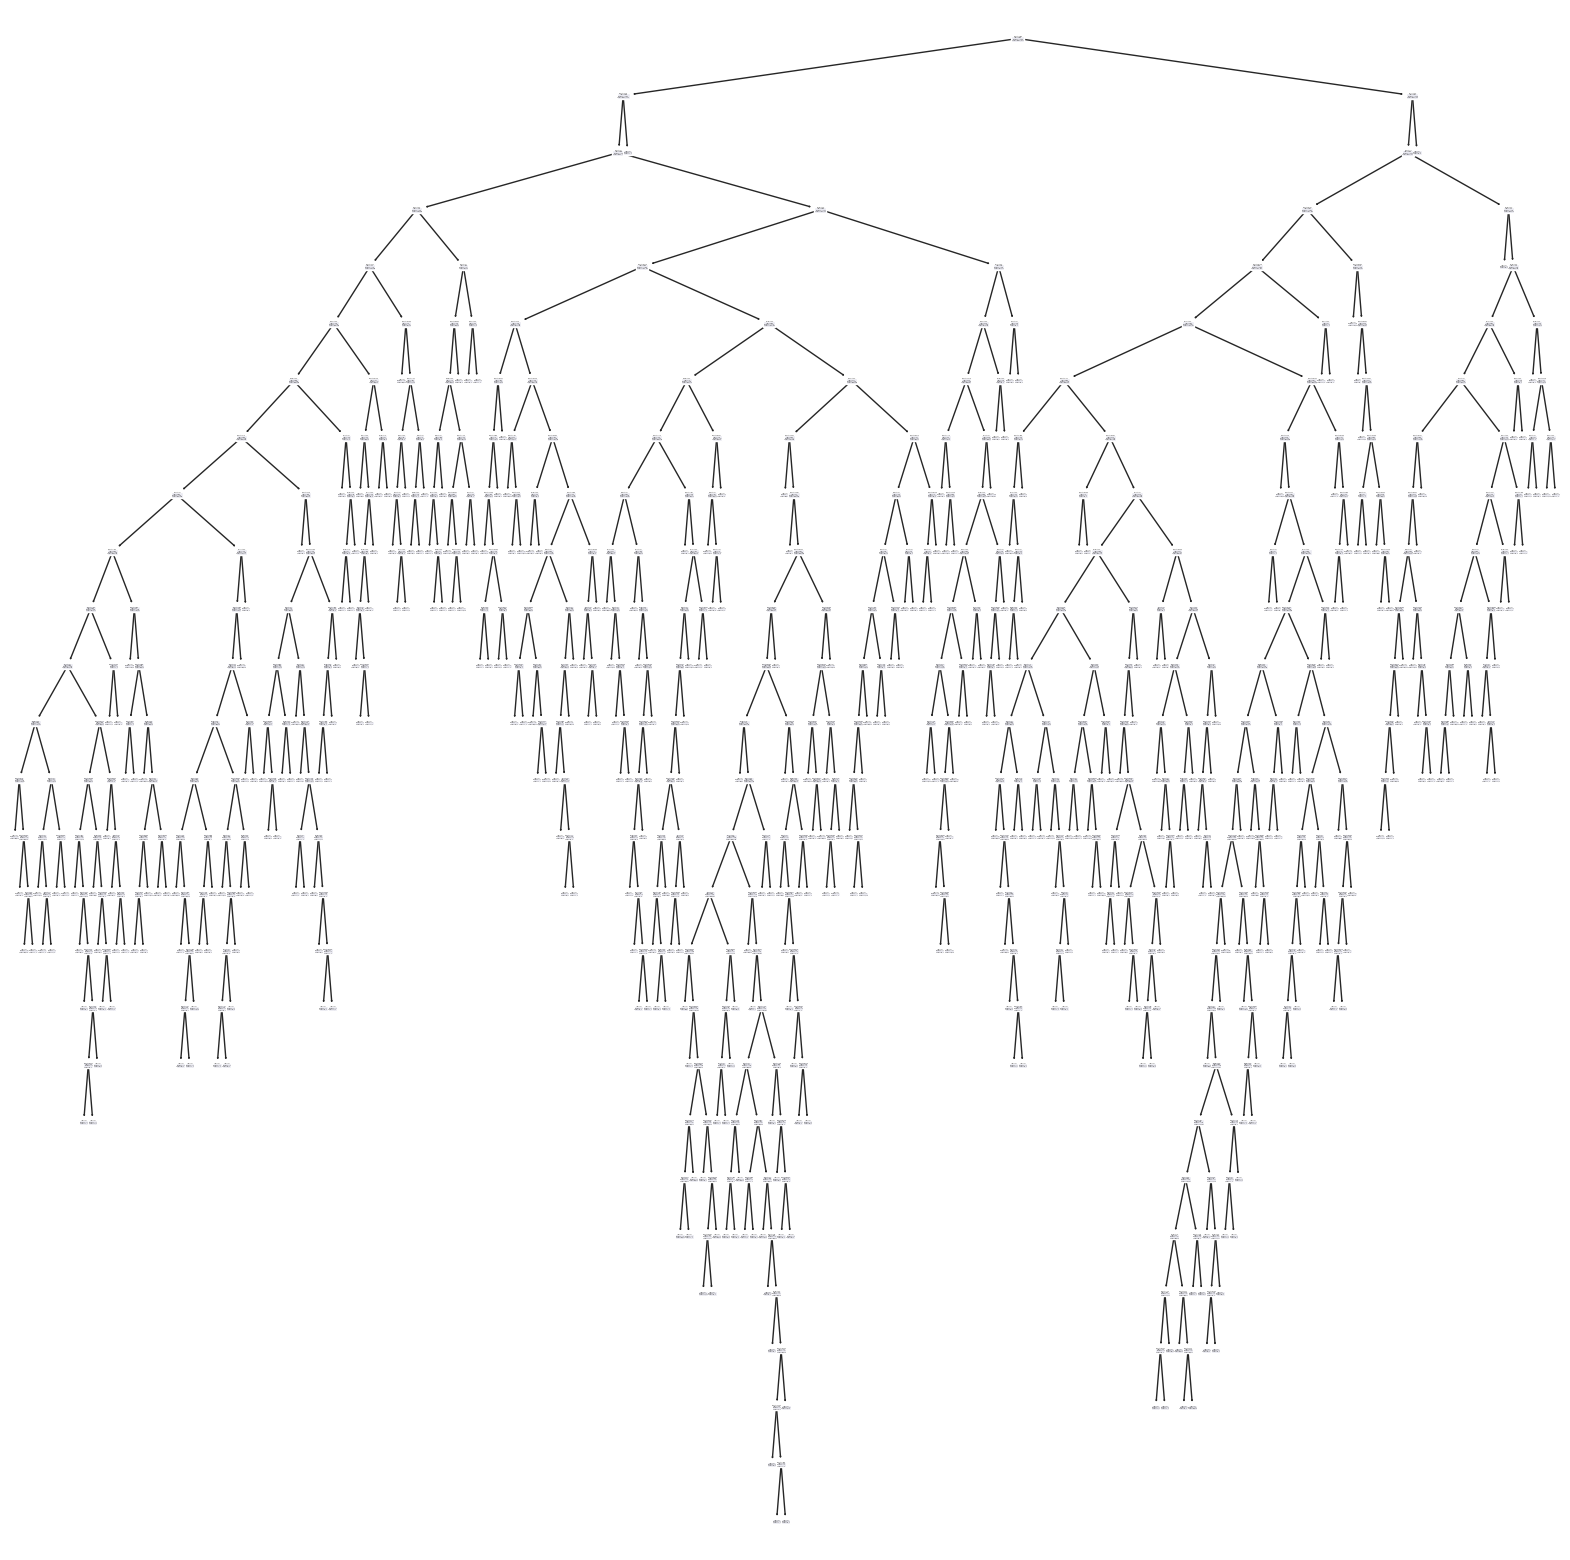

In [5]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(xtrain, ytrain)
plt.figure(figsize=(20,20))
plot_tree(clf)


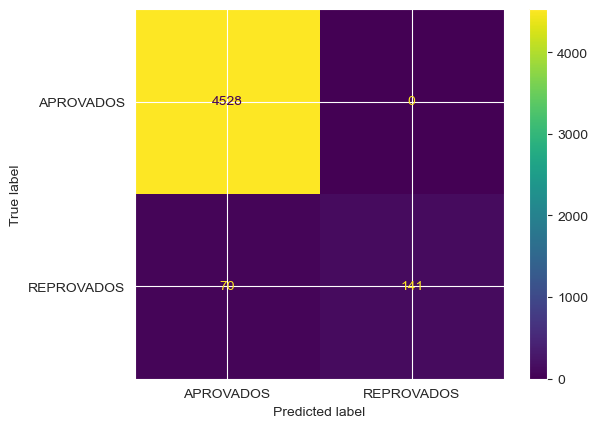

In [6]:
ConfusionMatrixDisplay.from_estimator(clf, xtrain, ytrain, display_labels=['APROVADOS', 'REPROVADOS'])

In [7]:
pre = clf.predict(xtrain)
accuracy_score(ytrain, pre)

0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

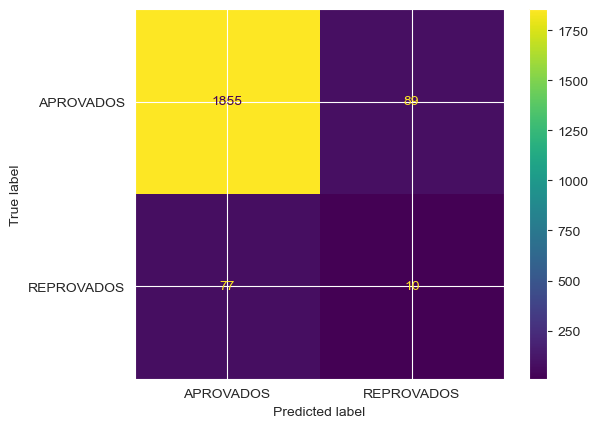

In [8]:
ConfusionMatrixDisplay.from_estimator(clf, xtest, ytest, display_labels=['APROVADOS', 'REPROVADOS'])


In [9]:
pret = clf.predict(xtest)
accuracy_score(ytest, pret)

0.9182668636139832

In [10]:
## a base de treinamento teve um valor maior, oq ja era esperado, devido termos treinado nosso modelo com ela

[Text(0.49187613224637683, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.082\nsamples = 4739\nvalue = [4536, 203]'),
 Text(0.257133152173913, 0.8636363636363636, 'x[5] <= 10.34\ngini = 0.111\nsamples = 1617\nvalue = [1522, 95]'),
 Text(0.21173007246376813, 0.7727272727272727, 'x[5] <= 10.037\ngini = 0.123\nsamples = 1291\nvalue = [1206, 85]'),
 Text(0.16983695652173914, 0.6818181818181818, 'x[22] <= 0.5\ngini = 0.118\nsamples = 1272\nvalue = [1192, 80]'),
 Text(0.12228260869565218, 0.5909090909090909, 'x[24] <= 0.5\ngini = 0.113\nsamples = 1219\nvalue = [1146, 73]'),
 Text(0.08152173913043478, 0.5, 'x[25] <= 0.5\ngini = 0.107\nsamples = 1148\nvalue = [1083, 65]'),
 Text(0.05434782608695652, 0.4090909090909091, 'x[5] <= 8.364\ngini = 0.104\nsamples = 1128\nvalue = [1066, 62]'),
 Text(0.036231884057971016, 0.3181818181818182, 'x[5] <= 7.171\ngini = 0.11\nsamples = 1029\nvalue = [969, 60]'),
 Text(0.021739130434782608, 0.22727272727272727, 'x[5] <= 6.671\ngini = 0.103\nsamples = 957\nvalue =

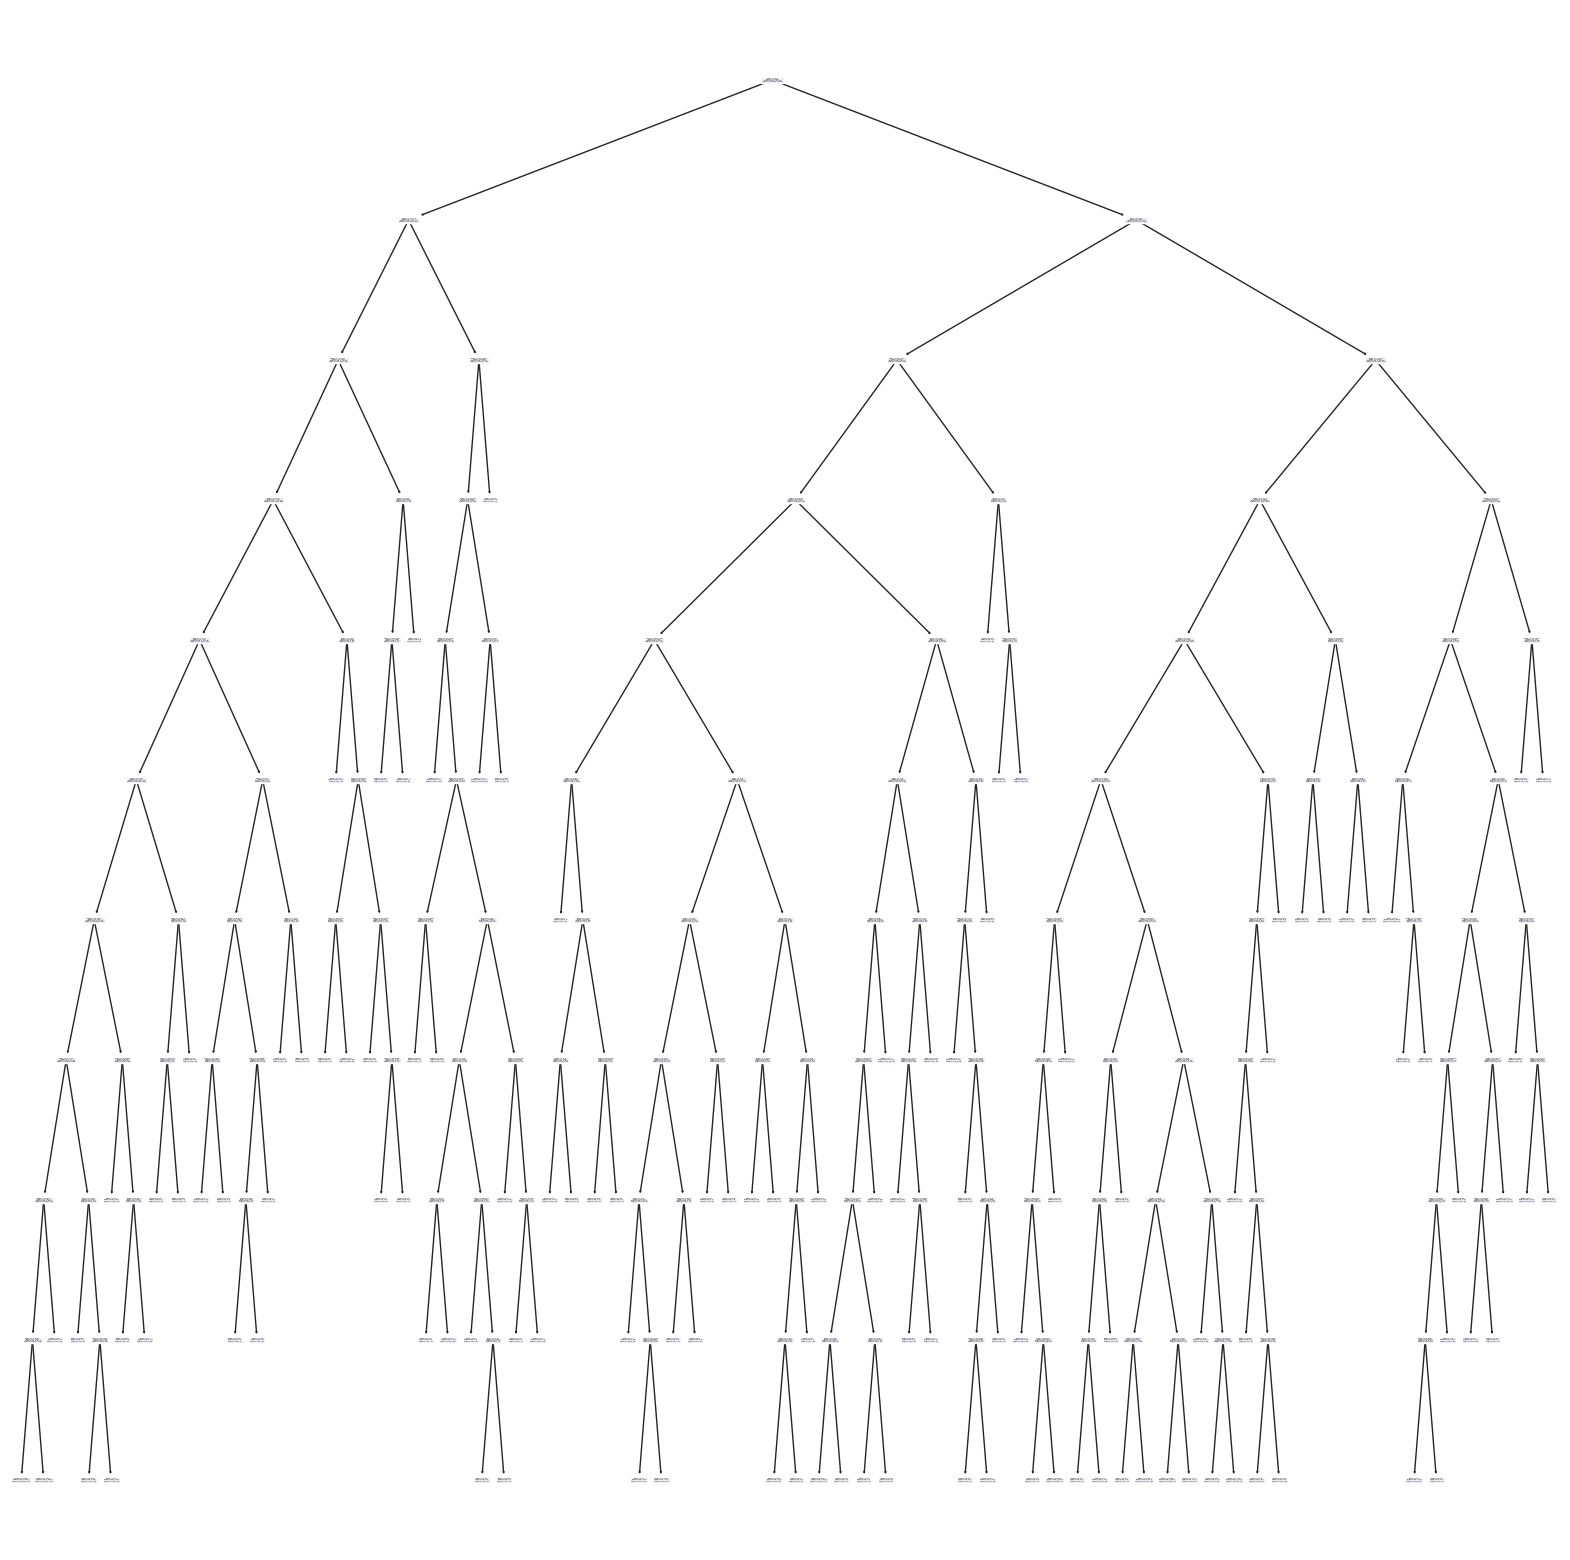

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123).fit(xtrain, ytrain)
plt.figure(figsize=(20,20))
plot_tree(clf)

In [12]:
pre = clf.predict(xtest)
accuracy_score(ytest, pre)

0.9507631708517972

In [13]:
#com a podagem tivemos um aumento na acuracia da base de treino

In [14]:
pre = clf.predict(xtrain)
accuracy_score(ytrain, pre)

0.9582190335513822

In [15]:
#houve reducao na de treino
df.to_csv('resumo_cartao_credito_2.csv', index=False)
